### 통신사 고객 이탈 데이터 EDA


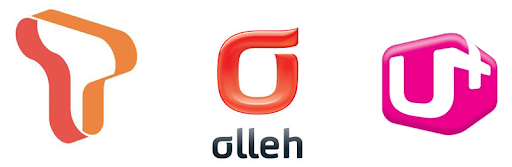

## 1. Imprort data & packages

In [1]:
%run C:/Users/HSS/dd.py
print('done')

done


In [267]:
churn = pd.read_csv('C:/Users/HSS/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [284]:
pd.set_option('display.max_columns', None)
churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [482]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Description 
- `customerID`: Customer ID 고객 ID
- `gender`: Whether the customer is a male or a female 고객 성별
- `SeniorCitizen`: Whether the customer is a senior citizen or not (1, 0) 65세 이상(경로)
- `Partner`: Whether the customer has a partner or not (Yes, No) 배우자 여부
- `Dependents`: Whether the customer has dependents or not (Yes, No) 자녀 여부
- `tenure`: Number of months the customer has stayed with the company 계약 기간
- `PhoneService`: Whether the customer has a phone service or not (Yes, No) 핸드폰 서비스 사용 여부
- `MultipleLines`: Whether the customer has multiple lines or not (Yes, No, No phone service)
- `InternetService`: Customer’s internet service provider (DSL, Fiber optic, No) 인터넷 서비스 종류 (DSL, Fiber, optic, No)
- `OnlineSecurity`: Whether the customer has online security or not (Yes, No, No internet service) (온라인보안서비스가입여부)
- `OnlineBackup`: Whether the customer has online backup or not (Yes, No, No internet service) (온라인백업서비스가입여부)
- `DeviceProtection`: Whether the customer has device protection or not (Yes, No, No internet service) (기기보호)
- `TechSupport`: Whether the customer has tech support or not (Yes, No, No internet service)
- `StreamingTV`: Whether the customer has streaming TV or not (Yes, No, No internet service)
- `StreamingMovie`: Whether the customer has streaming movies or not (Yes, No, No internet service)
- `Contract`: The contract term of the customer (Month-to-month, One year, Two year)
- `PaperlessBilling`: Whether the customer has paperless billing or not (Yes, No)
- `PaymentMethod`: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- `MonthlyCharges`: The amount charged to the customer monthly
- `TotalCharges`: The total amount charged to the customer
- `ChurnWhether`: the customer churned or not (Yes or No)

### - 데이터 전처리
- Partener, Dependents 등 Yes or No로 되어 있는 데이터를 1과 0으로 변경
- Churn과 Customer 세트 분리하기


In [483]:
# Yes, NO ONE HOT 
data = churn.copy()
columns = data.columns.values
y_n_columns = columns[[3,4,6,9,10,11,12,13,14,16,20]]
y_n_columns

for i in y_n_columns:
    data[i] = data[i].apply(lambda x: 0 if x == 'No' else 1)

data['gender'] = data['gender'].apply(lambda x: 0 if x == 'Male' else 1)
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [484]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors= 'coerce')
print(sum(np.isnan(data['TotalCharges'])))
data.info()

11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(14), object(5)


## Nan 처리
- `TotalCharges` 칼럼에 11개 Nan 존재
- 모두 `Tenure`: 0, `TotalCharges` : Nan, `MonthlyCharges`가 존재했기 때문에 11개의 Nan 값을 `MohtnlyCharges`로 대체

In [485]:
idx = np.isnan(data['TotalCharges'])
data['TotalCharges'][idx] = data['MonthlyCharges'][idx]

In [486]:
# Nan 제거 완료
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(14), object(5)
mem

In [487]:
churns = data[data['Churn'] == 1]
customers = data[data['Churn'] == 0]

## 대략적인 데이터 경향

- `Churn` 과 `tenure`가 가장 밀접한 선형 관계를 갖고 있다.
- `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies` 가 같은 방향으로 움직인다. 

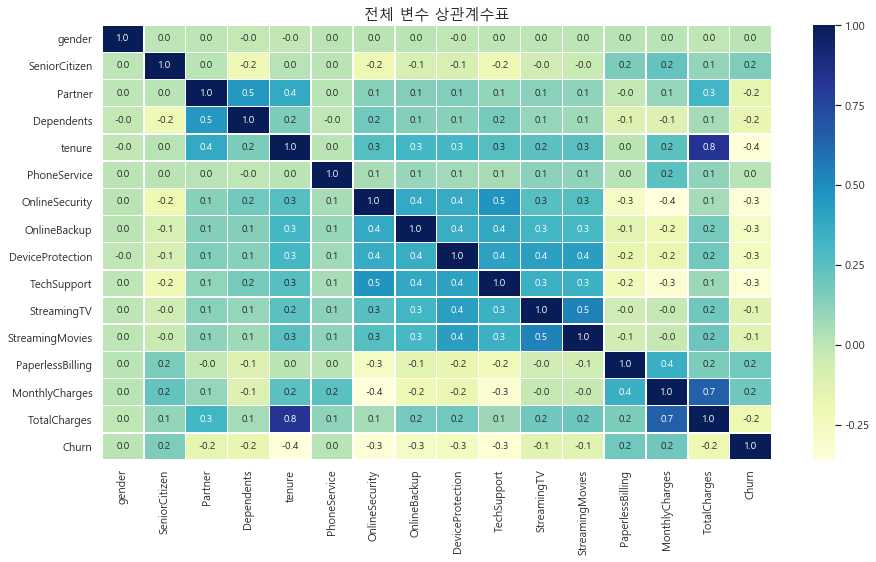

In [488]:
plt.figure(figsize = (15,8))
plt.title('전체 변수 상관계수표', fontsize = 15)
sns.heatmap(data.corr(), annot=True, linewidths=.5, cmap = 'YlGnBu',fmt= '.1f')
# RdYlGn_r, YlGnBu
plt.show()

###  병합

- 높은 상관관계를 갖고 보장 성격을 갖는 변수들(`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `Tech support`)를 `Insurance`로 병합

- `StreamingTV`와 `StreamingMovies`를 `Streaming`으로 병합

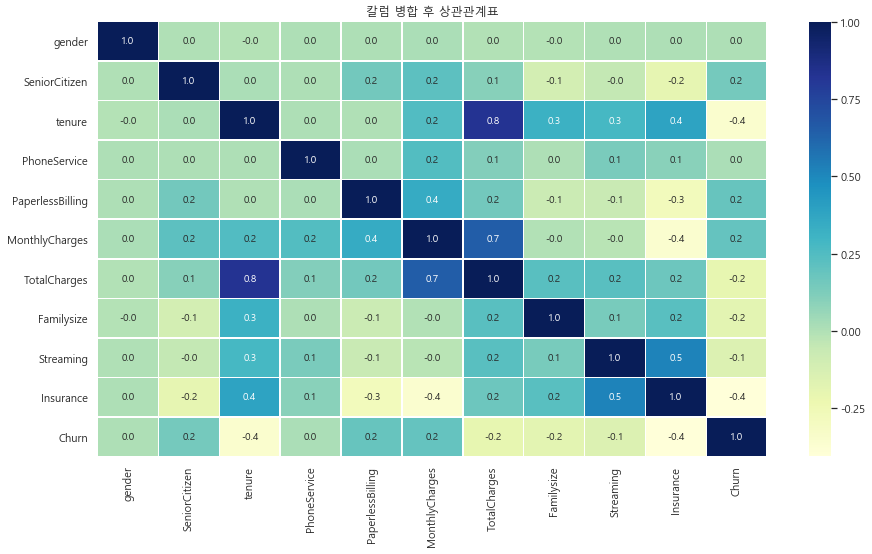

In [489]:
data['Insurance'] = data[['OnlineBackup', 'OnlineSecurity','DeviceProtection','TechSupport']].sum(axis = 1)
data['Streaming'] = data[['StreamingMovies', 'StreamingTV']].sum(axis = 1)
data['Familysize'] = data[['Partner', 'Dependents']].sum(axis = 1)+1


insurance = ['OnlineBackup','OnlineSecurity','DeviceProtection','TechSupport']
streaming = ['StreamingMovies','StreamingTV']
family = ['Partner', 'Dependents' ]

[data.drop(x,axis=1, inplace = True) for x in insurance]
[data.drop(x,axis=1, inplace = True) for x in streaming]
[data.drop(x,axis=1, inplace = True) for x in family]

cols = list(data.columns)
cols[-4:] = cols[-4:][::-1]

data = data[cols]
data.head()

plt.figure(figsize = (15,8))
plt.title('칼럼 병합 후 상관관계표')
sns.heatmap(data.corr(), annot=True, linewidths=.5, cmap = 'YlGnBu',fmt= '.1f')
plt.show()

In [490]:
clean_data = data.copy()
churns = clean_data[clean_data['Churn'] == 1]
customers = clean_data[clean_data['Churn'] == 0]

### Demographic info
   - `Sex`
   - `SeniorCitizen`
   - `Familysize`


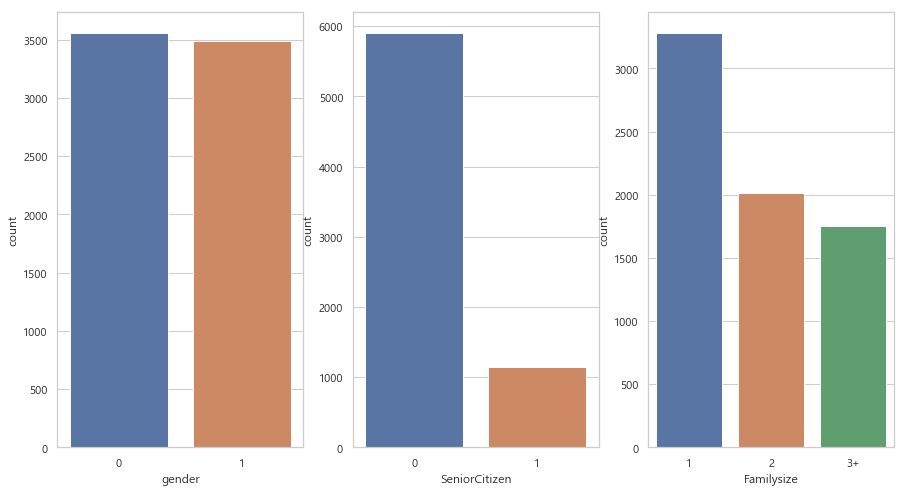

In [491]:
plt.figure(figsize = (15,8))
plt.subplot(131)
sns.countplot(clean_data['gender'])
plt.subplot(132)
sns.countplot(clean_data['SeniorCitizen'])
plt.subplot(133)
clean_data.loc[clean_data['Familysize'] >= 3] = '3+'
sns.countplot(clean_data['Familysize'].astype('str').sort_values())
plt.show()

## 01. Tenure

- 전체 고객의 Tenure 평균, 3분위, 최소계약기간, 최장계약기간, 분포
- 이탈 고객의 Tenure 평균, 3분위, 최소계약기간, 최장계약기간, 분포
- 유지 고객의 Tenure 평균, 3분위, 최소계약기간, 최장계약기간, 분포




- `이탈 고객의 특징`: Tenure 기간이 상대적으로 짧다.

In [492]:
clean_data = data.copy()
print(' \n [전체 고객]의 평균 계약 기간은 {}개월이고, 75%의 사람들은 {}개월 이하 동안 해당 통신사를 사용했습니다. \n 최단 계약 기간은 {}개월인 반면, 최장 계약 기간은 무려 {}개월입니다. '
     .format(int(clean_data['tenure'].mean()), int(clean_data['tenure'].quantile(0.75)), clean_data['tenure'].min(), clean_data['tenure'].max()))

print(' \n [이탈 고객]의 평균 계약 기간은 {}개월이고, 75%의 사람들은 {}개월 이하 동안 해당 통신사를 사용했습니다. \n 최단 계약 기간은 {}개월인 반면, 최장 계약 기간은 무려 {}개월입니다. '
     .format(int(churns['tenure'].mean()), int(churns['tenure'].quantile(0.75)), churns['tenure'].min(), churns['tenure'].max()))

print(' \n [유지 고객]의 평균 계약 기간은 {}개월이고, 75%의 사람들은 {}개월 이하 동안 해당 통신사를 사용했습니다. \n 최단 계약 기간은 {}개월인 반면, 최장 계약 기간은 무려 {}개월입니다. '
     .format(int(customers['tenure'].mean()), int(customers['tenure'].quantile(0.75)), customers['tenure'].min(), customers['tenure'].max()))

 
 [전체 고객]의 평균 계약 기간은 32개월이고, 75%의 사람들은 55개월 이하 동안 해당 통신사를 사용했습니다. 
 최단 계약 기간은 0개월인 반면, 최장 계약 기간은 무려 72개월입니다. 
 
 [이탈 고객]의 평균 계약 기간은 17개월이고, 75%의 사람들은 29개월 이하 동안 해당 통신사를 사용했습니다. 
 최단 계약 기간은 1개월인 반면, 최장 계약 기간은 무려 72개월입니다. 
 
 [유지 고객]의 평균 계약 기간은 37개월이고, 75%의 사람들은 61개월 이하 동안 해당 통신사를 사용했습니다. 
 최단 계약 기간은 0개월인 반면, 최장 계약 기간은 무려 72개월입니다. 


## 01-1. 가설 1 : 이탈 고객은 단시간에 계약을 이탈했을 것이다.

#  
  
#### - 계약 기간 10개월 미만 구간에서 유지고객과 이탈고객의 차이가 가장 크게 두드러졌다.  
#### - 고객의 이탈을 효과적으로 예방하려면 서비스 가입 10개월 이내에 조취를 취하는 것이 중요!


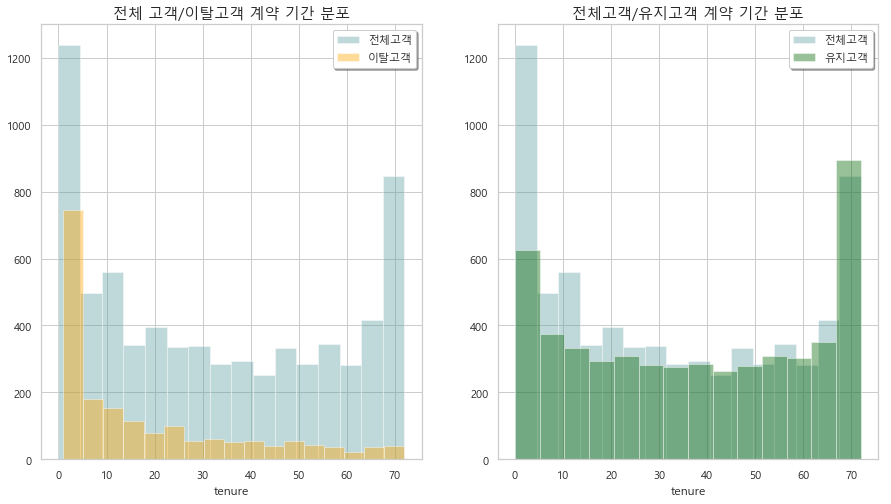

In [493]:
plt.figure(figsize = (15,8))
plt.subplot(121)

plt.title('전체 고객/이탈고객 계약 기간 분포', fontsize = 15)
sns.distplot(clean_data['tenure'], color = 'cadetblue', kde = False)
sns.distplot(churns['tenure'], color = 'orange', kde = False)
plt.legend(['전체고객', '이탈고객'], shadow = True)
# sns.distplot(customers['tenure'], color = 'orange', kde = False)

plt.subplot(122)
plt.title('전체고객/유지고객 계약 기간 분포', fontsize = 15)
sns.distplot(clean_data['tenure'], color = 'cadetblue', kde = False)
# sns.distplot(churns['tenure'], color = 'orange', kde = False)
sns.distplot(customers['tenure'], color = 'darkgreen', kde = False)
plt.legend(['전체고객', '유지고객'], shadow = True)

plt.show()

In [494]:
print('이탈 고객 {}명 중 {}명({}%)가 계약 10개월 이내 서비스를 해지했다.'.format 
      (
      len(churns),
      len(churns[churns['tenure']<=10]), 
      round(len(churns[churns['tenure']<=10])/len(churns)*100,1))
     )

이탈 고객 1869명 중 968명(51.8%)가 계약 10개월 이내 서비스를 해지했다.


### 10개월 미만 해지 고객의 특성은?
- 연령,  가족규모 , 보장서비스, 월요금
- 이탈 10개월 이내, 유지 10개월 이내간 비교


- 초반 이탈 고객은 유지 고객보다 Insurance를 많이 들지 않았다.

In [544]:
churn_in_10 = churns[churns['tenure']<=10]
stay_in_10 = customers[customers['tenure'] <=10]

In [557]:
churn_in_10.describe()-stay_in_10.describe()

,gender,SeniorCitizen,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Familysize,Streaming,Insurance,Churn
count,-34.000000,-34.000000,-34.000000,-34.000000,-34.000000,-34.000000,-34.000000,-34.000000,-34.000000,-34.000000,-34.0
mean,0.032217,0.120888,-1.016057,-0.006499,0.242715,19.517565,28.166166,-0.150195,-0.282654,-1.195596,1.0
std,0.000515,0.122683,-0.205827,0.008674,-0.046121,-0.934580,36.374637,-0.125434,-0.082865,-0.449575,0.0
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.100000,0.050000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,-1.000000,0.000000,0.000000,25.862500,14.500000,0.000000,0.000000,0.000000,1.0
50%,1.000000,0.000000,-2.000000,0.000000,1.000000,27.275000,-3.225000,0.000000,0.000000,-2.000000,1.0
75%,0.000000,0.000000,-2.000000,0.000000,0.000000,14.662500,46.462500,0.000000,0.000000,-3.000000,1.0
max,0.000000,0.000000,0.000000,0.000000,0.000000,2.150000,16.500000,0.000000,0.000000,0.000000,1.0


In [554]:
churn_in_10.describe()


,gender,SeniorCitizen,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Familysize,Streaming,Insurance,Churn
count,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.0
mean,0.508264,0.209711,3.467975,0.896694,0.711777,65.861777,247.494060,1.367769,0.758264,0.853306,1.0
std,0.500190,0.407313,2.850463,0.304515,0.453170,23.976168,246.245436,0.642412,0.829544,1.222492,0.0
min,0.000000,0.000000,1.000000,0.000000,0.000000,18.850000,18.850000,1.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,1.000000,1.000000,0.000000,46.162500,70.087500,1.000000,0.000000,0.000000,1.0
50%,1.000000,0.000000,2.000000,1.000000,1.000000,72.525000,144.550000,1.000000,1.000000,0.000000,1.0
75%,1.000000,0.000000,5.000000,1.000000,1.000000,84.362500,362.787500,2.000000,2.000000,1.000000,1.0
max,1.000000,1.000000,10.000000,1.000000,1.000000,110.100000,1081.450000,3.000000,2.000000,4.000000,1.0


In [553]:
stay_in_10.describe()

,gender,SeniorCitizen,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Familysize,Streaming,Insurance,Churn
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.0
mean,0.476048,0.088822,4.484032,0.903194,0.469062,46.344212,219.327894,1.517964,1.040918,2.048902,0.0
std,0.499675,0.284629,3.056289,0.295842,0.499291,24.910748,209.870799,0.767846,0.912409,1.672067,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.750000,18.800000,1.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,2.000000,1.000000,0.000000,20.300000,55.587500,1.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,4.000000,1.000000,0.000000,45.250000,147.775000,1.000000,1.000000,2.000000,0.0
75%,1.000000,0.000000,7.000000,1.000000,1.000000,69.700000,316.325000,2.000000,2.000000,4.000000,0.0
max,1.000000,1.000000,10.000000,1.000000,1.000000,107.950000,1064.950000,3.000000,2.000000,4.000000,0.0


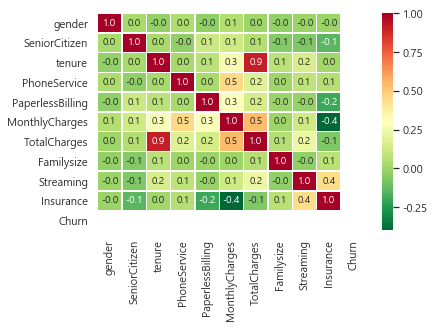

In [550]:
sns.heatmap(churn_in_10.corr(), annot=True, linewidths=.5, cmap = 'RdYlGn_r',fmt= '.1f')

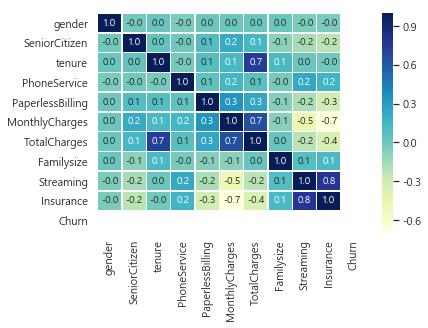

In [549]:
sns.heatmap(stay_in_10.corr(), annot=True, linewidths=.5, cmap = 'YlGnBu',fmt= '.1f')

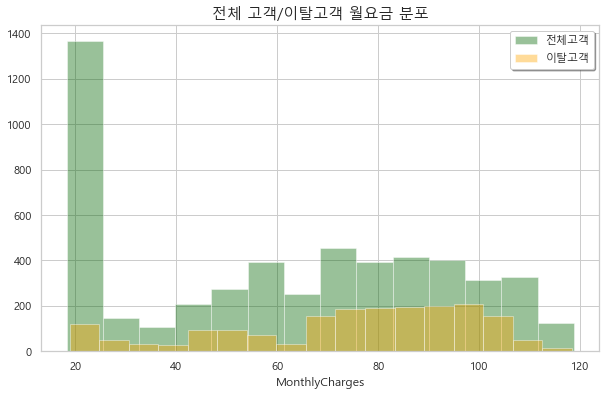

In [504]:
# sns.distplot(churns['TotalCharges'], kde = False)
plt.figure(figsize = (10,6))


plt.title('전체 고객/이탈고객 월요금 분포', fontsize = 15)
sns.distplot(customers['MonthlyCharges'], color = 'darkgreen', kde = False)
sns.distplot(churns['MonthlyCharges'], color = 'orange', kde = False)
plt.legend(['전체고객', '이탈고객'], shadow = True)

plt.show()



## Tenure 그룹화

- 0~6개월, 6~12개월, 12~24개월, 24개월~36개월, 36+



In [536]:
clean_data = data.copy()

def tenure(clean_data):
    if clean_data['tenure'] <6 :
        return '0-6개월'
    elif (clean_data['tenure'] >= 6) and  (clean_data['tenure'] < 12):
        return '6-12개월'
    elif (clean_data['tenure'] >= 12) and  (clean_data['tenure'] < 24):
        return  '1-2년'
    elif (clean_data['tenure'] >= 24) and  (clean_data['tenure'] < 36):
        return  '2-3년'
    else:
        return  '3+년'
    



clean_data['tenure_group'] = clean_data.apply(lambda clean_data: tenure(clean_data), axis = 1)
clean_data.head()

    
churns = clean_data[clean_data['Churn'] == 1]
customers = clean_data[clean_data['Churn'] == 0]


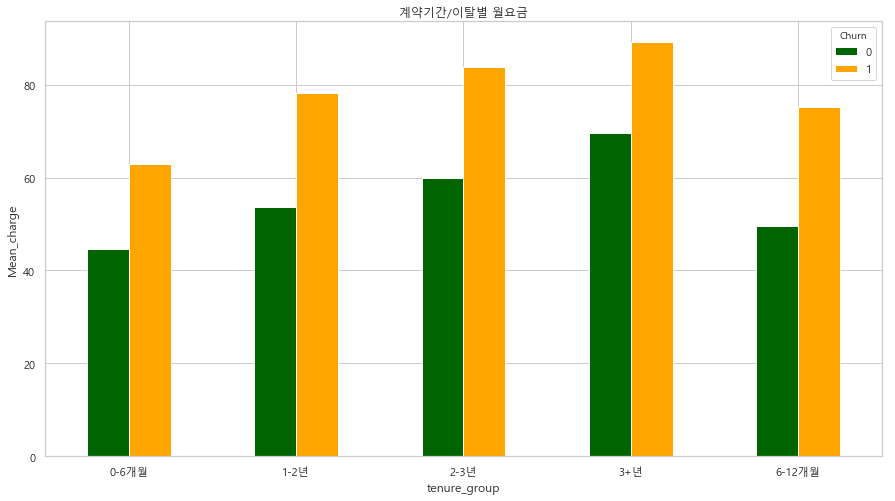

In [506]:
clean_data['tenure_group'] = clean_data.apply(lambda clean_data: tenure(clean_data), axis = 1)
mc_by_tenure_churn = clean_data.groupby(['tenure_group','Churn']).mean()['MonthlyCharges'].reset_index()
mc_by_tenure_churn = mc_by_tenure_churn.pivot('tenure_group','Churn','MonthlyCharges')
mc_by_tenure_churn.plot(kind = 'bar', title = '계약기간/이탈별 월요금', rot = False, figsize = (15,8), color = ['darkgreen','orange'])
plt.ylabel('Mean_charge')
plt.show()

In [527]:
clean_data.head()

,customerID,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Familysize,Streaming,Insurance,Churn,tenure_group
0,7590-VHVEG,1,0,1,0,No phone service,DSL,Month-to-month,1,Electronic check,29.85,29.85,2,0,1,0,0-6개월
1,5575-GNVDE,0,0,34,1,No,DSL,One year,0,Mailed check,56.95,1889.50,1,0,2,0,2-3년
2,3668-QPYBK,0,0,2,1,No,DSL,Month-to-month,1,Mailed check,53.85,108.15,1,0,2,1,0-6개월
3,7795-CFOCW,0,0,45,0,No phone service,DSL,One year,0,Bank transfer (automatic),42.30,1840.75,1,0,3,0,3+년
4,9237-HQITU,1,0,2,1,No,Fiber optic,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,1,0-6개월


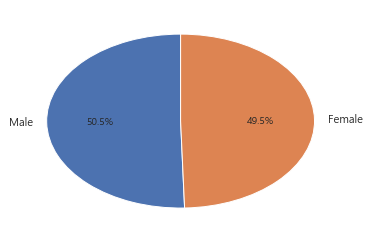

In [525]:
x = clean_data.groupby('gender').count()['customerID'].values
plt.pie(x, labels = ['Male', 'Female'], startangle=90,autopct='%1.1f%%')
plt.show()

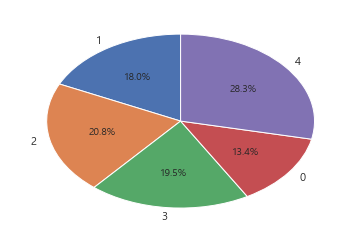

In [526]:
x = clean_data.groupby('Insurance').count()['customerID'].values
plt.pie(x, labels = clean_data['Insurance'].unique(), startangle=90,autopct='%1.1f%%')
plt.show()

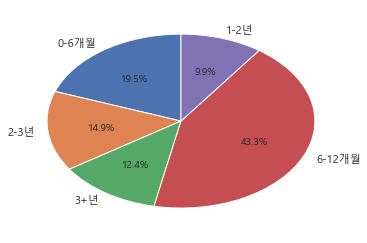

In [528]:
x = clean_data.groupby('tenure_group').count()['customerID'].values
plt.pie(x, labels = clean_data['tenure_group'].unique(), startangle=90,autopct='%1.1f%%')
plt.show()

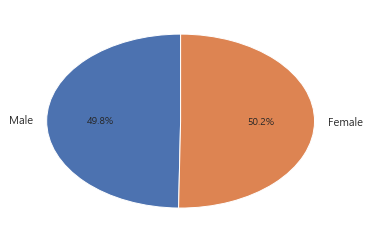

In [529]:
x = churns.groupby('gender').count()['customerID'].values
plt.pie(x, labels = ['Male', 'Female'], startangle=90,autopct='%1.1f%%')
plt.show()

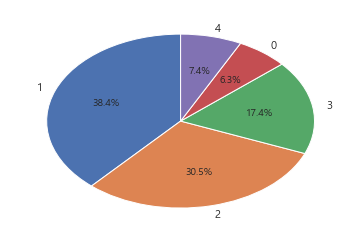

In [530]:
x = churns.groupby('Insurance').count()['customerID'].values
plt.pie(x, labels = clean_data['Insurance'].unique(), startangle=90,autopct='%1.1f%%')
plt.show()

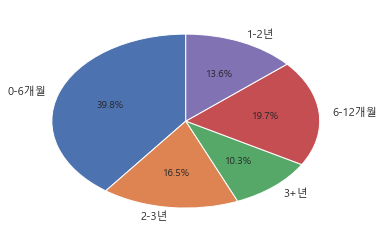

In [537]:
x = churns.groupby('tenure_group').count()['customerID'].values
plt.pie(x, labels = clean_data['tenure_group'].unique(), startangle=90,autopct='%1.1f%%')
plt.show()

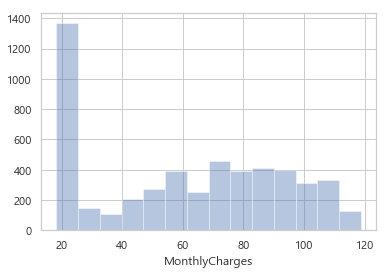

In [15]:
sns.distplot(customers['MonthlyCharges'], kde = False)

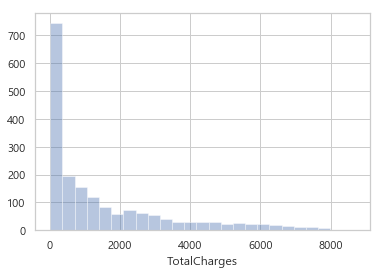

In [538]:
sns.distplot(churns['TotalCharges'], kde = False)

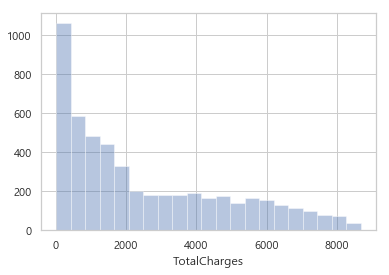

In [17]:
sns.distplot(customers['TotalCharges'], kde = False)

In [20]:
data.describe() - early_out.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000
mean,-0.047564,0.254727,0.160125,28.903173,0.006472,0.330816,0.319815,0.303325,0.325068,0.220857,0.226473,-0.119558,-1.100084,2032.304932,-0.734630
std,-0.038701,0.079790,0.111502,21.709018,-0.008763,0.121997,0.067876,0.059021,0.114094,0.004045,0.003814,0.038287,6.113879,2020.484733,0.441561
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.600000,-0.050000,-1.000000
25%,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.662500,328.462500,-1.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-2.175000,1250.000000,-1.000000
75%,0.000000,1.000000,1.000000,50.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.487500,3423.812500,0.000000
max,0.000000,0.000000,0.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.650000,7603.350000,0.000000


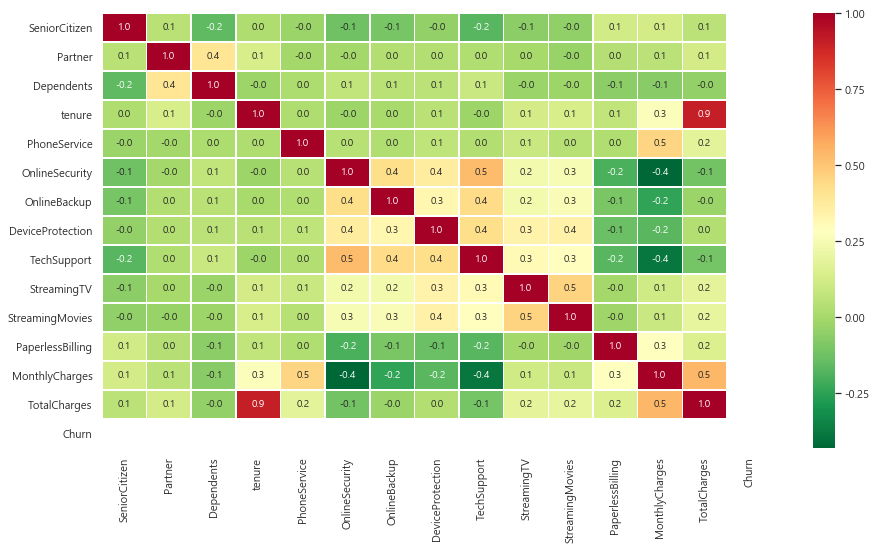

In [21]:
plt.figure(figsize = (15,8))
sns.heatmap(early_out.corr(), annot=True, cmap  = 'RdYlGn_r',linewidths=.5, fmt= '.1f')
plt.show()


## 훈련 데이터, 테스트 데이터 분리

In [22]:
customers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
6,1452-KIOVK,Male,0,0,1,22,1,Yes,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,Female,0,0,0,10,0,No phone service,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0
9,6388-TABGU,Male,0,0,1,62,1,No,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0
10,9763-GRSKD,Male,0,1,1,13,1,No,DSL,1,0,0,0,0,0,Month-to-month,1,Mailed check,49.95,587.45,0
11,7469-LKBCI,Male,0,0,0,16,1,No,No,1,1,1,1,1,1,Two year,0,Credit card (automatic),18.95,326.80,0
12,8091-TTVAX,Male,0,1,0,58,1,Yes,Fiber optic,0,0,1,0,1,1,One year,0,Credit card (automatic),100.35,5681.10,0
14,5129-JLPIS,Male,0,0,0,25,1,No,Fiber optic,1,0,1,1,1,1,Month-to-month,1,Electronic check,105.50,2686.05,0


### - 데이터 전처리
- Partener, Dependents 등 Yes or No로 되어 있는 데이터를 1과 0으로 변경
- Churn과 Customer 세트 분리하기


### Churn과 Customer 의 유의미한 차이가 있을까

In [23]:
len(churns), len(customers)

(1869, 5174)

In [24]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, cmap = 'YlGnBu',fmt= '.1f')
plt.show()

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(churns.corr(), annot=True, cmap  = 'RdYlGn_r',linewidths=.5, fmt= '.1f')
plt.show()

In [461]:
clean_data.head(5)

,customerID,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Familysize,Streaming,Insurance,Churn,tenure_group
0,7590-VHVEG,Female,0,1,0,No phone service,DSL,Month-to-month,1,Electronic check,29.85,29.85,2,0,1,0,0-6개월
1,5575-GNVDE,Male,0,34,1,No,DSL,One year,0,Mailed check,56.95,1889.50,1,0,2,0,2-3년
2,3668-QPYBK,Male,0,2,1,No,DSL,Month-to-month,1,Mailed check,53.85,108.15,1,0,2,1,0-6개월
3,7795-CFOCW,Male,0,45,0,No phone service,DSL,One year,0,Bank transfer (automatic),42.30,1840.75,1,0,3,0,3+년
4,9237-HQITU,Female,0,2,1,No,Fiber optic,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,1,0-6개월


In [466]:
clean_data

,customerID,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Familysize,Streaming,Insurance,Churn,tenure_group
0,7590-VHVEG,Female,0,1,0,No phone service,DSL,Month-to-month,1,Electronic check,29.85,29.85,2,0,1,0,0-6개월
1,5575-GNVDE,Male,0,34,1,No,DSL,One year,0,Mailed check,56.95,1889.50,1,0,2,0,2-3년
2,3668-QPYBK,Male,0,2,1,No,DSL,Month-to-month,1,Mailed check,53.85,108.15,1,0,2,1,0-6개월
3,7795-CFOCW,Male,0,45,0,No phone service,DSL,One year,0,Bank transfer (automatic),42.30,1840.75,1,0,3,0,3+년
4,9237-HQITU,Female,0,2,1,No,Fiber optic,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,1,0-6개월
5,9305-CDSKC,Female,0,8,1,Yes,Fiber optic,Month-to-month,1,Electronic check,99.65,820.50,1,2,1,1,6-12개월
6,1452-KIOVK,Male,0,22,1,Yes,Fiber optic,Month-to-month,1,Credit card (automatic),89.10,1949.40,2,1,1,0,1-2년
7,6713-OKOMC,Female,0,10,0,No phone service,DSL,Month-to-month,0,Mailed check,29.75,301.90,1,0,1,0,6-12개월
8,7892-POOKP,Female,0,28,1,Yes,Fiber optic,Month-to-month,1,Electronic check,104.80,3046.05,2,2,2,1,2-3년
9,6388-TABGU,Male,0,62,1,No,DSL,One year,0,Bank transfer (automatic),56.15,3487.95,2,0,2,0,3+년


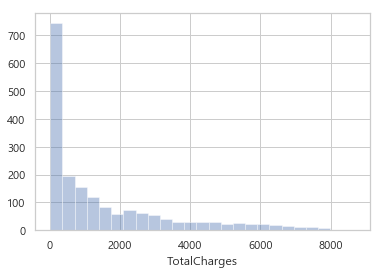

In [540]:
sns.distplot(churns['TotalCharges'], kde = False)